### This notebook contains the code rlevant for data cleaning and processing. It also includes some basic plots and summary statistics. 

In [ ]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import climate_change_util as cc

##### Reading and cleaning the OECD dataset

In [2]:
oecd = pd.read_csv('./Data/MUNW_27112022020812290.csv', usecols=[0,1,3,5,7,9,11,12,14])

##### Cleaning and reshaping using the functions created in the climate_change_util script

In [3]:
oecd = cc.clean_data(oecd,['Country','Variable'])

In [4]:
oecd.head()

,COU,Country,Variable,Year,Unit,PowerCode,Reference Period,Value,Flags
0,AUS,Australia,Municipal waste generated,1992,Tonnes,Thousands,NaN,12000.000,NaN
1,AUS,Australia,Municipal waste generated,2000,Tonnes,Thousands,NaN,13200.000,NaN
2,AUS,Australia,Municipal waste generated,2007,Tonnes,Thousands,NaN,12885.684,NaN
3,AUS,Australia,Municipal waste generated,2008,Tonnes,Thousands,NaN,13096.500,Estimated value
4,AUS,Australia,Municipal waste generated,2009,Tonnes,Thousands,NaN,13343.236,NaN


In [5]:
oecd_reshaped = cc.long_to_wide(oecd,['Year','COU','Country'],'Variable','Value',['Country', 'Year'])

In [6]:
oecd_reshaped.head()

Variable                               % Composting  % Disposal  \
Year COU Country                                                  
1990 AUT Austria                             23.171      56.277   
     BEL Belgium                              5.983      66.751   
     CHE Switzerland                          6.341      22.680   
     CHN China (People's Republic of)           NaN         NaN   
     DEU Germany                                NaN         NaN   

Variable                               % Incineration  \
Year COU Country                                        
1990 AUT Austria                                8.881   
     BEL Belgium                               45.039   
     CHE Switzerland                           48.773   
     CHN China (People's Republic of)             NaN   
     DEU Germany                                  NaN   

Variable                               % Incineration with energy recovery  \
Year COU Country                                                             
1990 AUT Austria                                                     8.881   
     BEL Belgium                                                    22.141   
     CHE Switzerland                                                48.773   
     CHN China (People's Republic of)                                  NaN   
     DEU Germany                                                       NaN   

Variable                               % Incineration without energy recovery  \
Year COU Country                                                                
1990 AUT Austria                                                          NaN   
     BEL Belgium                                                       22.898   
     CHE Switzerland                                                    0.000   
     CHN China (People's Republic of)                                     NaN   
     DEU Germany                                                          NaN   

Variable                               % Landfill  \
Year COU Country                                    
1990 AUT Austria                           56.277   
     BEL Belgium                           43.853   
     CHE Switzerland                       22.680   
     CHN China (People's Republic of)         NaN   
     DEU Germany                              NaN   

Variable                               % Material recovery (Recycling + Composting)  \
Year COU Country                                                                      
1990 AUT Austria                                                             34.529   
     BEL Belgium                                                             11.108   
     CHE Switzerland                                                         28.547   
     CHN China (People's Republic of)                                           NaN   
     DEU Germany                                                                NaN   

Variable                               % Other disposal  % Other recovery  \
Year COU Country                                                            
1990 AUT Austria                                    NaN             0.313   
     BEL Belgium                                    NaN               NaN   
     CHE Switzerland                                NaN               NaN   
     CHN China (People's Republic of)               NaN               NaN   
     DEU Germany                                    NaN               NaN   

Variable                               % Recovery  ...  \
Year COU Country                                   ...   
1990 AUT Austria                           43.723  ...   
     BEL Belgium                           33.249  ...   
     CHE Switzerland                       77.320  ...   
     CHN China (People's Republic of)         NaN  ...   
     DEU Germany                              NaN  ...   

Variable                               Municipal waste generated per capita  \
Year CO

###### Convert the pivot table to dataframe

In [7]:
oecd_final = pd.DataFrame(oecd_reshaped.to_records())
oecd_final.tail()

,Year,COU,Country,% Composting,% Disposal,% Incineration,% Incineration with energy recovery,% Incineration without energy recovery,% Landfill,% Material recovery (Recycling + Composting),...,Municipal waste generated per capita,"Municipal waste generated, Index 1990","Municipal waste generated, Index 2000",Municipal waste treated,Other disposal,Other municipal waste,Other recovery,Recycling,Total Incineration,Waste from households
1195,2020,POL,Poland,12.030,41.047,NaN,20.250,1.269,39.779,38.702,...,346.581,118.192,107.287,13116.898,NaN,1828.615,NaN,3498.629,NaN,11288.283
1196,2020,PRT,Portugal,14.289,53.455,NaN,18.979,0.000,53.455,27.566,...,517.667,175.950,112.200,5070.835,0.000,0.000,0.000,673.228,NaN,0.000
1197,2020,SVK,Slovak Republic,13.720,49.755,NaN,7.952,0.004,49.751,42.287,...,433.292,NaN,172.838,2361.663,0.000,1029.008,0.147,674.654,NaN,1336.614
1198,2020,SVN,Slovenia,18.142,11.023,NaN,13.970,2.544,8.479,74.958,...,492.600,NaN,100.400,808.953,0.000,395.637,0.000,459.605,NaN,628.439
1199,2020,SWE,Sweden,18.262,0.475,NaN,60.597,0.000,0.427,38.576,...,441.597,139.369,118.203,4422.317,2.092,684.280,14.219,898.350,NaN,3775.526


##### Reading and cleaning the World Bank's WDI dataset

In [8]:
wdi = pd.read_csv('./Data/Data.csv')

In [9]:
wdi = wdi.drop(['Series Code'],axis=1)

In [10]:
wdi_clean = cc.clean_data(wdi,['Country Name','Series Name'])

In [11]:
wdi_long = cc.wide_to_long(wdi_clean,"YR",["index","Country Name","Country Code"],"Year",["Country Code", "Country Name", "Year", "Series Name", "YR"])

In [12]:
wdi_long.head()

,Country Code,Country Name,Year,Series Name,YR
0,ARG,Argentina,1980,CO2 emissions (metric tons per capita),NaN
1,ARG,Argentina,1981,CO2 emissions (metric tons per capita),NaN
2,ARG,Argentina,1982,CO2 emissions (metric tons per capita),NaN
3,ARG,Argentina,1983,CO2 emissions (metric tons per capita),NaN
4,ARG,Argentina,1984,CO2 emissions (metric tons per capita),NaN


In [13]:
wdi_reshaped = cc.long_to_wide(wdi_long,['Year','Country Code','Country Name'],'Series Name','YR',['Year','Country Name'])

In [14]:
wdi_reshaped.head()

Series Name                                   CO2 emissions (metric tons per capita)  \
Year Country Code Country Name                                                         
1980 ABW          Aruba                                                          NaN   
     AFE          Africa Eastern and Southern                                    NaN   
     AFG          Afghanistan                                                    NaN   
     AFW          Africa Western and Central                                     NaN   
     AGO          Angola                                                         NaN   

Series Name                                   Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)  \
Year Country Code Country Name                                                                                                                     
1980 ABW          Aruba                                                                      NaN                                                   
     AFE          Africa Eastern and Southern                                                NaN                                                   
     AFG          Afghanistan                                                                NaN                                                   
     AFW          Africa Western and Central                                                 NaN                                                   
     AGO          Angola                                                                     NaN                                                   

Series Name                                   Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)  \
Year Country Code Country Name                                                                                                                   
1980 ABW          Aruba                                                                      NaN                                                 
     AFE          Africa Eastern and Southern                                                NaN                                                 
     AFG          Afghanistan                                                                NaN                                                 
     AFW          Africa Western and Central                                                 NaN                                                 
     AGO          Angola                                                                     NaN                                                 

Series Name                                   Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)  \
Year Country Code Country Name                                                                                                                    
1980 ABW          Aruba                                                                      NaN                                                  
     AFE          Africa Eastern and Southern                                                NaN                                                  
     AFG          Afghanistan                                                                NaN                                                  
     AFW          Africa Western and Central                                                 NaN                                                  
     AGO          Angola                                                                     NaN                                                  

Series Name                                   Energy use (kg of oil equivalent per capita)  \
Year Country Code Country Name                                                               
1980 ABW          Aruba                                                                NaN   
     AFE   

In [15]:
wdi_reshaped = wdi_reshaped.rename({'Country Code': 'COU'})
wdi_reshaped.head()

Series Name                                   CO2 emissions (metric tons per capita)  \
Year Country Code Country Name                                                         
1980 ABW          Aruba                                                          NaN   
     AFE          Africa Eastern and Southern                                    NaN   
     AFG          Afghanistan                                                    NaN   
     AFW          Africa Western and Central                                     NaN   
     AGO          Angola                                                         NaN   

Series Name                                   Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)  \
Year Country Code Country Name                                                                                                                     
1980 ABW          Aruba                                                                      NaN                                                   
     AFE          Africa Eastern and Southern                                                NaN                                                   
     AFG          Afghanistan                                                                NaN                                                   
     AFW          Africa Western and Central                                                 NaN                                                   
     AGO          Angola                                                                     NaN                                                   

Series Name                                   Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)  \
Year Country Code Country Name                                                                                                                   
1980 ABW          Aruba                                                                      NaN                                                 
     AFE          Africa Eastern and Southern                                                NaN                                                 
     AFG          Afghanistan                                                                NaN                                                 
     AFW          Africa Western and Central                                                 NaN                                                 
     AGO          Angola                                                                     NaN                                                 

Series Name                                   Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)  \
Year Country Code Country Name                                                                                                                    
1980 ABW          Aruba                                                                      NaN                                                  
     AFE          Africa Eastern and Southern                                                NaN                                                  
     AFG          Afghanistan                                                                NaN                                                  
     AFW          Africa Western and Central                                                 NaN                                                  
     AGO          Angola                                                                     NaN                                                  

Series Name                                   Energy use (kg of oil equivalent per capita)  \
Year Country Code Country Name                                                               
1980 ABW          Aruba                                                                NaN   
     AFE   

###### Convert the pivot table to dataframe

In [16]:
wdi_final = pd.DataFrame(wdi_reshaped.to_records())

In [17]:
wdi_final.head()

,Year,Country Code,Country Name,CO2 emissions (metric tons per capita),"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",Energy use (kg of oil equivalent per capita),Forest area (sq. km),GDP (constant 2015 US$),...,"Government expenditure on education, total (% of government expenditure)",Population density (people per sq. km of land area),Population growth (annual %),"Population, female","Population, female (% of total population)","Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Urban population (% of total population),Urban population growth (annual %)
0,1980,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,333.872222222222,0.208213685729551,30806,51.2604622526915,60097,NaN,NaN,50.472,0.178188464900201
1,1980,AFE,Africa Eastern and Southern,NaN,NaN,NaN,NaN,789.384320528797,NaN,333894467085.439,...,NaN,15.5992323017681,2.97433613234995,114440574,50.3464941930698,227305945,NaN,NaN,20.8449997980123,4.45422064112357
2,1980,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.4782055409901,-0.407658191922243,6568227,49.1762587504211,13356500,NaN,NaN,15.995,3.11083842471923
3,1980,AFW,Africa Western and Central,NaN,NaN,NaN,NaN,569.830665834955,NaN,245386033779.559,...,NaN,17.2325957518312,2.78142544618063,78003993,50.0403240214554,155882270,NaN,NaN,24.5185774336299,4.89701529375728
4,1980,AGO,Angola,NaN,NaN,NaN,NaN,547.044521890499,NaN,22133386922.5976,...,NaN,6.69069543595091,3.45385947653688,4115191,49.335186763678,8341290,NaN,NaN,24.298,8.11256004063561


###### Rename columns to have names for merging

In [18]:
wdi_final = wdi_final.rename(columns={'Country Code': 'COU', 'Country Name': 'Country'})

In [19]:
oecd_final.columns

Index(['Year', 'COU', 'Country', '% Composting', '% Disposal',
       '% Incineration', '% Incineration with energy recovery',
       '% Incineration without energy recovery', '% Landfill',
       '% Material recovery (Recycling + Composting)', '% Other disposal',
       '% Other recovery', '% Recovery', '% Recycling',
       'Amount designated for recovery operations', 'Bulky waste',
       'Composting', 'Disposal operations',
       'Electric and electronic equipment waste',
       'Household and similar waste', 'Incineration with energy recovery',
       'Incineration without energy recovery', 'Landfill',
       'Municipal waste generated', 'Municipal waste generated per capita',
       'Municipal waste generated, Index 1990',
       'Municipal waste generated, Index 2000', 'Municipal waste treated',
       'Other disposal', 'Other municipal waste', 'Other recovery',
       'Recycling', 'Total Incineration', 'Waste from households'],
      dtype='object')

In [20]:
wdi_final.columns

Index(['Year', 'COU', 'Country', 'CO2 emissions (metric tons per capita)',
       'Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)',
       'Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)',
       'Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)',
       'Energy use (kg of oil equivalent per capita)', 'Forest area (sq. km)',
       'GDP (constant 2015 US$)', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita growth (annual %)',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure on education, total (% of government expenditure)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Population, female',
       'Population, female (% of total population)', 'Population, total',
       'Poverty headcount ratio

###### Merge both dataframes to have one large dataframe for processing. 

In [21]:
merged_df = pd.merge(oecd_final, wdi_final, how='inner', left_on=['Year','COU'], right_on=['Year','COU']) #Needs to be fixed

In [22]:
merged_df.head()

,Year,COU,Country_x,% Composting,% Disposal,% Incineration,% Incineration with energy recovery,% Incineration without energy recovery,% Landfill,% Material recovery (Recycling + Composting),...,"Government expenditure on education, total (% of government expenditure)",Population density (people per sq. km of land area),Population growth (annual %),"Population, female","Population, female (% of total population)","Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Urban population (% of total population),Urban population growth (annual %)
0,1990,AUT,Austria,23.171,56.277,8.881,8.881,NaN,56.277,34.529,...,11.5131101608276,93.0422927775085,0.762001611316115,4005232,52.1660667580361,7677850,NaN,NaN,62.96,0.332494357748522
1,1990,BEL,Belgium,5.983,66.751,45.039,22.141,22.898,43.853,11.108,...,NaN,NaN,0.298235706313592,5090672,51.0733225104169,9967379,NaN,NaN,96.377,0.386473447431904
2,1990,CHE,Switzerland,6.341,22.680,48.773,48.773,0.000,22.680,28.547,...,17.181640625,169.888411039996,1.02687307219521,3437405,51.1859913754554,6715519,NaN,NaN,73.926,0.945758640258411
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120.448249116415,1.46730321087928,552721134,48.6899610599665,1135185000,72,NaN,26.442,4.30967848070248
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,227.517053819494,0.861969448764933,41104568,51.7474514630407,79433029,NaN,NaN,73.118,1.05636514177316


In [23]:
merged_df[['Country_x', 'Country_y']].head()

,Country_x,Country_y
0,Austria,Austria
1,Belgium,Belgium
2,Switzerland,Switzerland
3,China (People's Republic of),China
4,Germany,Germany


In [24]:
merged_df.columns.values

array(['Year', 'COU', 'Country_x', '% Composting', '% Disposal',
       '% Incineration', '% Incineration with energy recovery',
       '% Incineration without energy recovery', '% Landfill',
       '% Material recovery (Recycling + Composting)', '% Other disposal',
       '% Other recovery', '% Recovery', '% Recycling',
       'Amount designated for recovery operations', 'Bulky waste',
       'Composting', 'Disposal operations',
       'Electric and electronic equipment waste',
       'Household and similar waste', 'Incineration with energy recovery',
       'Incineration without energy recovery', 'Landfill',
       'Municipal waste generated',
       'Municipal waste generated per capita',
       'Municipal waste generated, Index 1990',
       'Municipal waste generated, Index 2000', 'Municipal waste treated',
       'Other disposal', 'Other municipal waste', 'Other recovery',
       'Recycling', 'Total Incineration', 'Waste from households',
       'Country_y', 'CO2 emissions (metri

###### Rename long column names for better readability. 

In [25]:
merged_df = merged_df.rename(columns={'Country_x': 'Country', '% Composting': 'Composting%', '% Disposal': 'Disposal%',\
                                      '% Landfill': 'Landfill%', '% Material recovery (Recycling + Composting)': 'Material_recovery%',\
                                     '% Recovery': 'Recovery%', '% Recycling': 'Recycling%', 'Amount designated for recovery operations': 'Amt_for_recovery_operations',\
                                     'Electric and electronic equipment waste': 'Electronic_waste',\
                                     'Household and similar waste': 'Household_waste', 'Municipal waste generated': 'Municipal_waste_generated',\
                                     'Municipal waste generated per capita': 'Municipal_waste_generated_percapita',\
                                     'Municipal waste generated, Index 1990': 'Municipal_waste_generated_1990',\
                                     'Municipal waste generated, Index 2000': 'Municipal_waste_generated_2000',\
                                     'Municipal waste treated': 'Municipal_waste_treated', 'Total Incineration': 'Total_Incineration',\
                                     'Waste from households': 'Waste_from_households',\
                                     'CO2 emissions (metric tons per capita)':'CO2_emissions_percapita',\
                                     'Educational attainment, at least Bachelor\'s or equivalent, population 25+, female (%) (cumulative)': 'Female_education_attainment_bach',\
                                     'Educational attainment, at least Bachelor\'s or equivalent, population 25+, male (%) (cumulative)': 'Male_education_attainment_bach',\
                                     'Educational attainment, at least Bachelor\'s or equivalent, population 25+, total (%) (cumulative)': 'Total_education_attainment_bach',\
                                     'Energy use (kg of oil equivalent per capita)': 'Energy_use_percapita',\
                                     'Forest area (sq. km)': 'Forest_area',\
                                      'GDP (constant 2015 US$)': 'GDP_2015_USD', 'GDP growth (annual %)': 'GDP_growth%',\
                                      'GDP per capita (constant 2015 US$)': 'GDP_percapita_2015_USD', \
                                      'GDP per capita growth (annual %)': 'GDP_percapita_growth%', 'Government expenditure on education, total (% of GDP)': 'Education_expense_%_of_gdp',\
                                     'Government expenditure on education, total (% of government expenditure)': 'Education_expense_%_of_total_exp',\
                                     'Population density (people per sq. km of land area)': 'Population_density',\
                                     'Population growth (annual %)': 'Population_growth%', 'Population, female': 'Population_female',\
                                     'Population, female (% of total population)': 'Population_female_%', 'Population, total': 'Population_total',\
                                     'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)': 'Poverty_headcount%_ppp',\
                                     'Poverty headcount ratio at national poverty lines (% of population)': 'Poverty_headcount%_national_line',\
                                     'Urban population (% of total population)': 'Population_urban%', 'Urban population growth (annual %)': 'Population_urban_growth%'})


###### Drop unnecessary columns. 

In [26]:
clean_df = merged_df.drop(['% Incineration', '% Incineration with energy recovery', '% Incineration without energy recovery',\
                          '% Other disposal', '% Other recovery', 'Bulky waste', 'Disposal operations',\
                           'Incineration with energy recovery', 'Incineration without energy recovery',\
                          'Other disposal', 'Other municipal waste', 'Other recovery'],axis=1)

In [49]:
clean_df.head()

,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,...,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.0,...,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.0,...,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.6,...,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365


### Metadata
##### As of now, Pandas does not have a robust method to store metadata, so metadata are stored as comments for reference. 

1.Material_recovery% = (Recycling + Composting)%.

2.Municipal_waste_generated_1990 = Municipal waste generated, Index 1990.

3.Municipal_waste_generated_2000 = Municipal waste generated, Index 2000.

4.Household_waste = in Tonnes.

5.Waste_from_households = in Tonnes.

6.CO2_emissions_percapita = metric tons per capita.

7.Female_education_attainment_bach = Educational attainment, at least Bachelor\'s or equivalent, population 25+, female (%) (cumulative).

8.Male_education_attainment_bach = Educational attainment, at least Bachelor\'s or equivalent, population 25+, male (%) (cumulative).

9.Total_education_attainment_bach = Educational attainment, at least Bachelor\'s or equivalent, population 25+, total (%) (cumulative).

10.Energy_use_percapita = Energy use (kg of oil equivalent per capita).

11.Forest_area = Forest area (sq. km).

12.GDP_percapita_2015_USD = GDP (constant 2015 USD).

13.GDP_percapita_growth = GDP per capita growth (annual %).

14.Education_expense_%_of_gdp = Government expenditure on education, total (% of GDP).

15.Education_expense_%_of_total_exp = Government expenditure on education, total (% of government expenditure).

16.Population_density = Population density (people per sq. km of land area).

17.Population_growth% = Population growth (annual %).

18.Poverty_headcount%_ppp = Poverty headcount ratio at $2.15 a day (2017 PPP, \% of population).

19.Poverty_headcount\%_national_line = Poverty headcount ratio at national poverty lines (\% of population).

20.Population_urban\% = Urban population (\% of total population).

21.Population_urban_growth\% = Urban population growth (annual \%).

22.GDP_2015_USD = GDP (constant 2015 US$).

23.GDP_growth% = GDP growth (annual %).

##### Note: 

1.Some variables are measuring the same thing but with different values like Household_waste and Waste_from_households. No clear difference is known at this point. 

2.Due to differences in spellings, abbreviations of names etc., there are 2 country columns (one from each dataframe). For now, we will keep both and remove later if one proves better for graphs etc. 


In [27]:
# To be deleted
#plots on the merged files using functions maybe
#hyp 1 on a separate file
#hyp 2...

In [28]:
clean_df.columns

Index(['Year', 'COU', 'Country', 'Composting%', 'Disposal%', 'Landfill%',
       'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_headcount%_ppp',
 

###### Check dtypes and convert where necessary. 

In [29]:
clean_df.dtypes

Year                                     int64
COU                                     object
Country                                 object
Composting%                            float64
Disposal%                              float64
Landfill%                              float64
Material_recovery%                     float64
Recovery%                              float64
Recycling%                             float64
Amt_for_recovery_operations            float64
Composting                             float64
Electronic_waste                       float64
Household_waste                        float64
Landfill                               float64
Municipal_waste_generated              float64
Municipal_waste_generated_percapita    float64
Municipal_waste_generated_1990         float64
Municipal_waste_generated_2000         float64
Municipal_waste_treated                float64
Recycling                              float64
Total_Incineration                     float64
Waste_from_ho

In [30]:
cc.convert_dtype(clean_df,['Female_education_attainment_bach','Male_education_attainment_bach','Total_education_attainment_bach',\
                       'GDP_growth%','GDP_percapita_growth%','Education_expense_%_of_gdp',\
                        'Education_expense_%_of_total_exp','GDP_percapita_2015_USD', 'GDP_2015_USD',\
                       'Population_growth%', 'Population_female_%', 'Poverty_headcount%_ppp',\
                       'Poverty_headcount%_national_line', 'Population_urban%', 'Population_urban_growth%',\
                       'CO2_emissions_percapita', 'Energy_use_percapita', 'Forest_area', 'Population_density'],\
                       ['Population_female', 'Population_total'],\
                       ['COU', 'Country','Country_y'])

In [31]:
clean_df.dtypes

Year                                     int64
COU                                     string
Country                                 string
Composting%                            float64
Disposal%                              float64
Landfill%                              float64
Material_recovery%                     float64
Recovery%                              float64
Recycling%                             float64
Amt_for_recovery_operations            float64
Composting                             float64
Electronic_waste                       float64
Household_waste                        float64
Landfill                               float64
Municipal_waste_generated              float64
Municipal_waste_generated_percapita    float64
Municipal_waste_generated_1990         float64
Municipal_waste_generated_2000         float64
Municipal_waste_treated                float64
Recycling                              float64
Total_Incineration                     float64
Waste_from_ho

##### Summary statistics

In [32]:
clean_df.describe()

,Year,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,Composting,Electronic_waste,...,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
count,1076.000000,823.000000,924.000000,941.000000,895.000000,907.000000,858.000000,947.000000,850.000000,248.000000,...,759.000000,1055.000000,1076.000000,1.076000e+03,1076.000000,1.076000e+03,681.000000,353.000000,1076.000000,1076.000000
mean,2006.182156,10.035549,54.526934,51.038226,28.228668,46.221372,19.819824,8492.724430,1653.250229,282.322476,...,12.948282,133.739952,0.571099,3.605072e+07,51.001522,7.233000e+07,1.792952,16.238810,74.034459,0.913130
std,8.148865,8.606104,33.765836,33.736434,18.682200,33.546255,12.563997,18699.744875,3406.294148,1240.460039,...,3.222039,126.291488,0.742970,1.025608e+08,1.077556,2.104025e+08,6.027218,5.086451,12.533740,1.023103
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.828970,2.277313,-2.258464,1.333210e+05,47.983044,2.674680e+05,0.000000,3.100000,26.442000,-2.282468
25%,2000.000000,2.272000,20.620500,17.279000,11.073000,15.534500,9.717500,372.465000,52.030000,3.960000,...,10.668070,35.595962,0.135649,2.629984e+06,50.412186,5.185058e+06,0.100000,12.700000,67.155750,0.308390
50%,2006.000000,8.157000,57.793000,56.032000,28.951000,42.388000,20.580500,2088.480000,327.470000,14.985000,...,12.603190,107.069264,0.513604,5.367950e+06,50.852385,1.040006e+07,0.300000,15.600000,75.472500,0.810591
75%,2013.000000,15.854000,86.447500,81.459000,43.017500,80.016500,27.287000,5808.590000,1596.775000,91.000000,...,15.145275,172.666617,1.070990,2.983851e+07,51.391928,5.814972e+07,0.900000,19.500000,82.627000,1.566850
max,2020.000000,38.928000,100.026000,100.000000,74.958000,100.000000,61.569000,132666.000000,24485.000000,9045.000000,...,30.151421,530.377275,2.890960,6.794869e+08,54.210582,1.396215e+09,72.000000,49.800000,98.079000,4.601685


In [35]:
clean_df.isnull().sum()

Year                                     0
COU                                      0
Country                                  0
Composting%                            253
Disposal%                              152
Landfill%                              135
Material_recovery%                     181
Recovery%                              169
Recycling%                             218
Amt_for_recovery_operations            129
Composting                             226
Electronic_waste                       828
Household_waste                        763
Landfill                                98
Municipal_waste_generated               31
Municipal_waste_generated_percapita     96
Municipal_waste_generated_1990         540
Municipal_waste_generated_2000         111
Municipal_waste_treated                104
Recycling                              190
Total_Incineration                     258
Waste_from_households                  477
Country_y                                0
CO2_emissio

##### Testing strong correlation between different variables

In [48]:
corr_matrix = clean_df.corr()
strong_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.5]
print(strong_corr_matrix)


                                         Year  Composting%  Disposal%  \
Year                                 1.000000          NaN        NaN   
Composting%                               NaN     1.000000  -0.682426   
Disposal%                                 NaN    -0.682426   1.000000   
Landfill%                                 NaN    -0.717239   0.962077   
Material_recovery%                        NaN     0.795497  -0.839744   
Recovery%                                 NaN     0.678854  -0.999540   
Recycling%                                NaN          NaN  -0.756778   
Amt_for_recovery_operations               NaN          NaN        NaN   
Composting                                NaN          NaN        NaN   
Electronic_waste                          NaN          NaN        NaN   
Household_waste                           NaN          NaN        NaN   
Landfill                                  NaN          NaN        NaN   
Municipal_waste_generated                 NaN      

/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_59162/3739285020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clean_df.corr()


/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_59162/1619043274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = clean_df.corr()


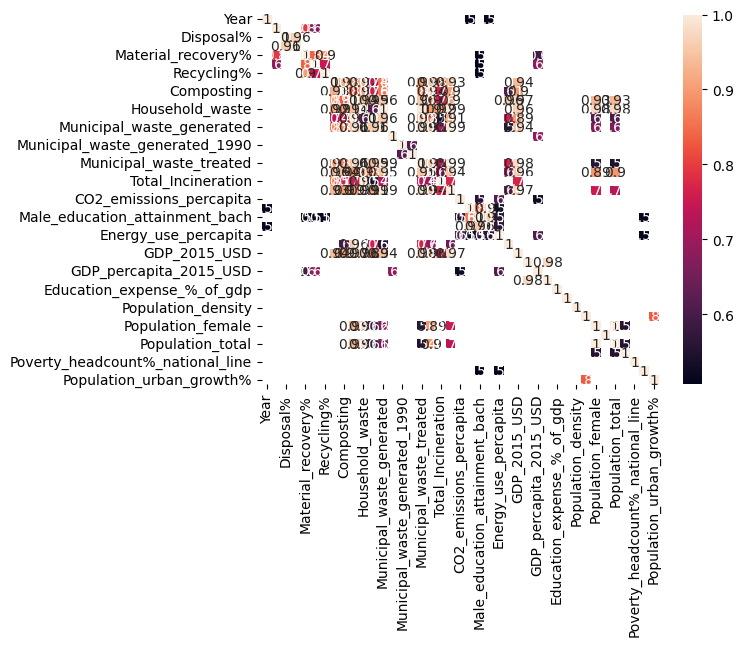

In [36]:
cor = clean_df.corr()
cor = cor[cor>0.5]
sns.heatmap(cor, annot=True)